In [1]:
import jiwer
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_directory = Path.cwd().parent

dataset_name = "yale/econ251"
data_directory = base_directory / 'data'

transcripts_directory = data_directory / 'inputs' / dataset_name / 'transcripts'
predictions_directory = data_directory / 'predictions' / dataset_name

In [3]:
transformation = jiwer.Compose([
    jiwer.ToUpperCase(),
    jiwer.RemoveWhiteSpace(replace_by_space=True),
    jiwer.RemoveMultipleSpaces(),
    jiwer.RemovePunctuation(),
    jiwer.ReduceToListOfListOfWords(word_delimiter=" ")
])

In [7]:
errors = []

# selected_files = ['01', '02', '03', '04', '05' ]
chunk_length = "_cl10"

for transcript in transcripts_directory.glob('*.txt'):
    file_no = transcript.stem
    # if file_no not in selected_files:
    #     continue

    # load the ground truth text
    with open(transcript, 'r') as f:
        ground_truth = f.read()

    # load the predicted text
    pred_file_name = 'pred_' + file_no + chunk_length
    pred_file_path = (predictions_directory / pred_file_name).with_suffix('.txt')

    with open(pred_file_path, 'r') as f:
        hypothesis = f.read()

    measures = jiwer.compute_measures(ground_truth,
                                      hypothesis,
                                      truth_transform=transformation,
                                      hypothesis_transform=transformation)
    wer = measures['wer']
    mer = measures['mer']
    wil = measures['wil']

    errors.append([wer, mer, wil])


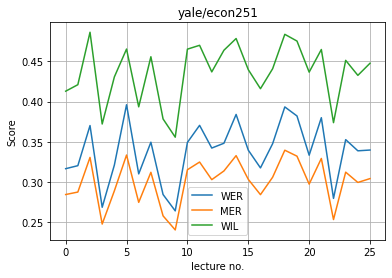

Average WER: 0.3383655431428245
Average MER: 0.30022032545957456
Average WIL: 0.4364870762427616


In [21]:
xrange = [i for i in range(len(errors))]

plt.plot(xrange, np.array(errors)[:,0], label="WER")
plt.plot(xrange, np.array(errors)[:,1], label="MER")
plt.plot(xrange, np.array(errors)[:,2], label="WIL")
plt.title(f"{dataset_name}")
plt.xlabel("lecture no.")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

print(f"Average WER: {np.average(np.array(errors)[:,0])}")
print(f"Average MER: {np.average(np.array(errors)[:,1])}")
print(f"Average WIL: {np.average(np.array(errors)[:,2])}")


WER: [0.32078547 0.3099969  0.30914312 0.30347718]
MER: [0.28403546 0.2745772  0.27442469 0.27008358]
WIL: [0.40904996 0.39345232 0.39454685 0.38906818]
[262, 268, 298, 377]


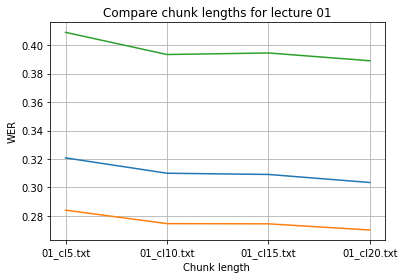

In [26]:
# Compare chunk lengths

ground_truth_file = transcripts_directory / "01.txt"
with open(ground_truth_file, 'r') as f:
    ground_truth = f.read()


predicted_texts = ["01_cl5.txt", "01_cl10.txt", "01_cl15.txt", "01_cl20.txt"]
errors = []
#
for pred in predicted_texts:
    file_path = predictions_directory / pred

    with open(file_path, 'r') as f:
        hypothesis = f.read()

    error = jiwer.wer(
        ground_truth,
        hypothesis,
        truth_transform=transformation,
        hypothesis_transform=transformation
    )

    measures = jiwer.compute_measures(ground_truth,
                                      hypothesis,
                                      truth_transform=transformation,
                                      hypothesis_transform=transformation)
    wer = measures['wer']
    mer = measures['mer']
    wil = measures['wil']

    errors.append([wer, mer, wil])
    # errors.append(error)

time_taken = [262, 268, 298, 377 ] # in seconds

print(f"WER: {np.array(errors)[:,0]}")
print(f"MER: {np.array(errors)[:,1]}")
print(f"WIL: {np.array(errors)[:,2]}")

print(time_taken)

plt.plot(predicted_texts, errors)
plt.title(f"Compare chunk lengths for lecture 01")
plt.xlabel("Chunk length ")
plt.ylabel("WER")
plt.grid()
plt.show()

In [ ]:
# a = sorted([(24, 236.9619152545929),
#             (21, 235.01005578041077),
#             (8, 246.15670609474182),
#             (25, 253.11157965660095),
#             (6, 235.29956769943237),
#             (14, 211.0605444908142),
#             (22, 253.51321268081665),
#             (9, 244.73863792419434),
#             (19, 256.65361642837524),
#             (12, 236.3466055393219),
#             (16, 256.7979187965393),
#             (17, 237.72897148132324),
#             (11, 242.14434432983398),
#             (20, 241.8887803554535),
#             (13, 241.84729146957397),
#             (15, 255.14147639274597),
#             (7, 284.6480383872986),
#             (26, 254.44510173797607),
#             (10, 246.0810046195984),
#             (23, 276.6807544231415),
#             (18, 279.50886487960815)])

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# plt.plot(range(1, len(a)+1, 1), [t[1] for t in sorted(a)])
# plt.show()